In [29]:
%matplotlib widget
from main import *
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Heaviside, sin, cos, pi
sp.init_printing()

In [30]:
Vcc = 5

Vin = 5 * cos(10 * t)

In [31]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg1", {"V+" : "V1", "V-" : Gnd}, V_t = Vin),
                    VoltageSource("Vg2", {"V+" : Gnd, "V-" : "V2"}, V_t = Vin),
                    
                    Diode("D1", {"Vp" : "V1", "Vn" : "V3"}),
                    Diode("D2", {"Vp" : "V2", "Vn" : "V3"}),
                    
                    Resistor("R1", {"V1" : "V3", "V2" : "Vc"}, R = 1),
                    
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 4, C = 5e-3),
                    CurrentSource("Iout", {"V+" : "Vc", "V-" : Gnd}, I_t = -10e-3),
)

{'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*cos(10*t)}},
 'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*cos(10*t)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
 'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.005, 'V0': 4}},
 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.01}}}

In [32]:
Solver.setMain("acTest")

{'elements': {'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.005, 'V0': 4}},
              'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
              'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
              'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.01}},
              'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}},
              'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*cos(10*t)}},
              'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*cos(10*t)}}},
 'nodes': {'Vc', 'V2', 'V1', 'V3'}}

In [33]:
compiled = Solver.compile()

In [34]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg1"]["V+"]
Id = compiled["currents"]["R1"]["V1"]
Vd1 = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vd2 = compiled["voltages"]["D2"]["Vp"] - compiled["voltages"]["D2"]["Vn"]
Vc = compiled["nodes"]["Vc"]
Iout = compiled["currents"]["Iout"]["V+"]

print(Vin)
print(Vc)
print(Iout)
print(Id)

{'Vc': V0, 'V2': V1, 'V1': V2, 'V3': V3}
V2
V0
I6_0
I4_0


In [35]:
model = solveLaplace(compiled, 2, tstep = 1e-4, debugLog = 1)

{V2, I4_1, I0_0, I4_0, I6_0, I5_0, I5_1, I2_0, V1, V0, I1_1, V3, I2_1, I3_1, I0_1, I1_0, I3_0, I6_1}
[Eq(I4_1 + I5_0 + I6_0, 0), Eq(I1_1 + I3_0, 0), Eq(I0_0 + I2_0, 0), Eq(I2_1 + I3_1 + I4_0, 0)]
{'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*cos(10*t)}}, 'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*cos(10*t)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}}, 'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.005, 'V0': 4}}, 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t'

In [36]:
#saveCompiled("full_rectifier", compiled)
#saveModel("full_rectifier", "Laplace", model)

In [37]:
#compiled = loadCompiled("full_rectifier")
#model = loadModel("full_rectifier", "Laplace")

In [38]:
printModel(model, var=t, measurments=[Vin, Vc])

{('Iout', ''), ('C1', ''), ('Vg2', ''), ('Vg1', ''), ('D2', 'Cut'), ('D1', 'Fwd'), ('R1', '')}
t ∈ Interval.Ropen(0, 0.0156418823242187)
V2  : 
5⋅cos(10⋅t)⋅U(t)
V0  : 
⎛                                              200⋅t        ⎞  -200⋅t     
⎝(10000⋅sin(10⋅t) + 200000⋅cos(10⋅t) - 24461)⋅ℯ      - 15139⎠⋅ℯ      ⋅U(t)
──────────────────────────────────────────────────────────────────────────
                                  40100                                   
-------------------------------------
{('Iout', ''), ('C1', ''), ('Vg2', ''), ('D1', 'Cut'), ('Vg1', ''), ('D2', 'Cut'), ('R1', '')}
t ∈ Interval.Ropen(0.0156418823242187, 0.266276916503893)
V2  : 
3⋅(-6490906548171⋅sin(10⋅t) + 41157979096331⋅cos(10⋅t))⋅U(t)
────────────────────────────────────────────────────────────
                       25000000000000                       
V0  : 
(27118484741589 - 12500000000000⋅t)⋅U(t)
────────────────────────────────────────
             6250000000000              
---------------------

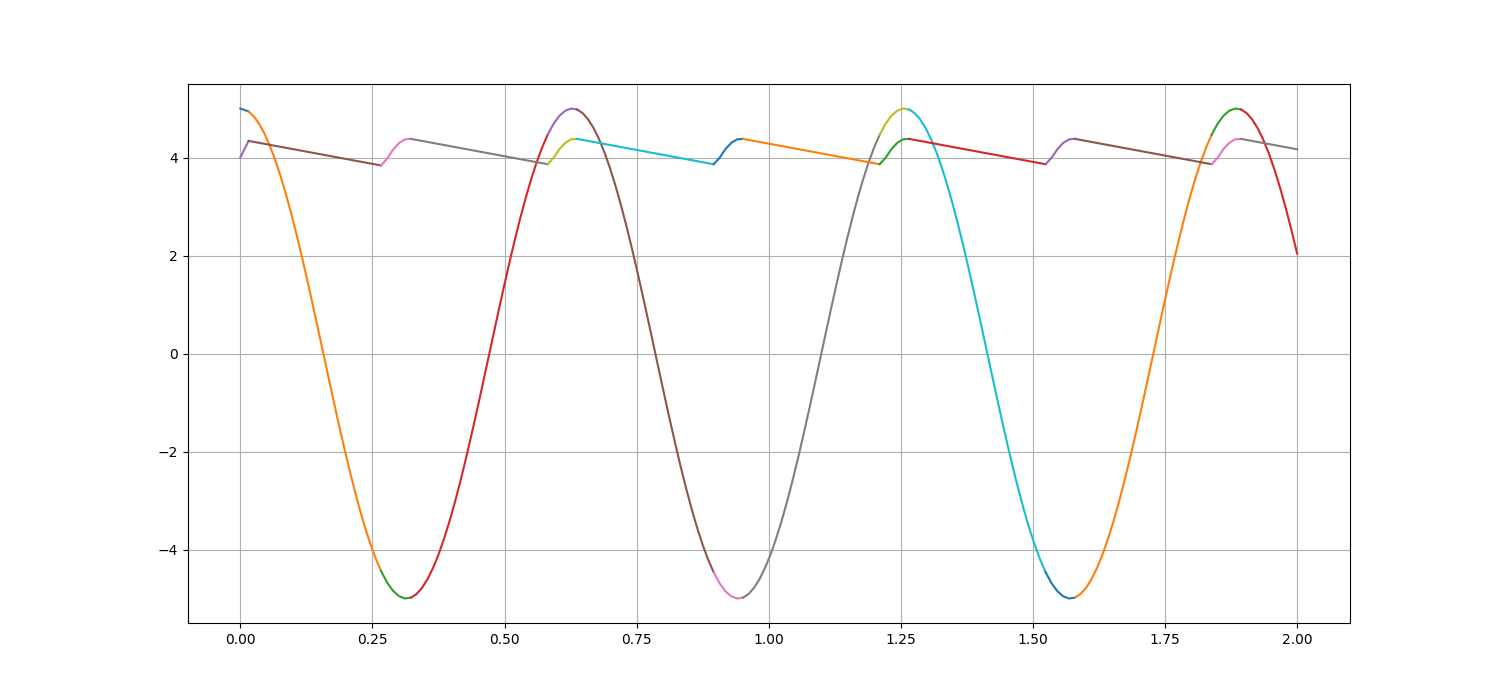

In [39]:
measurments =   [   
                    (t0, Vin, "Vin(t)"),
                    (t0, Vc, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

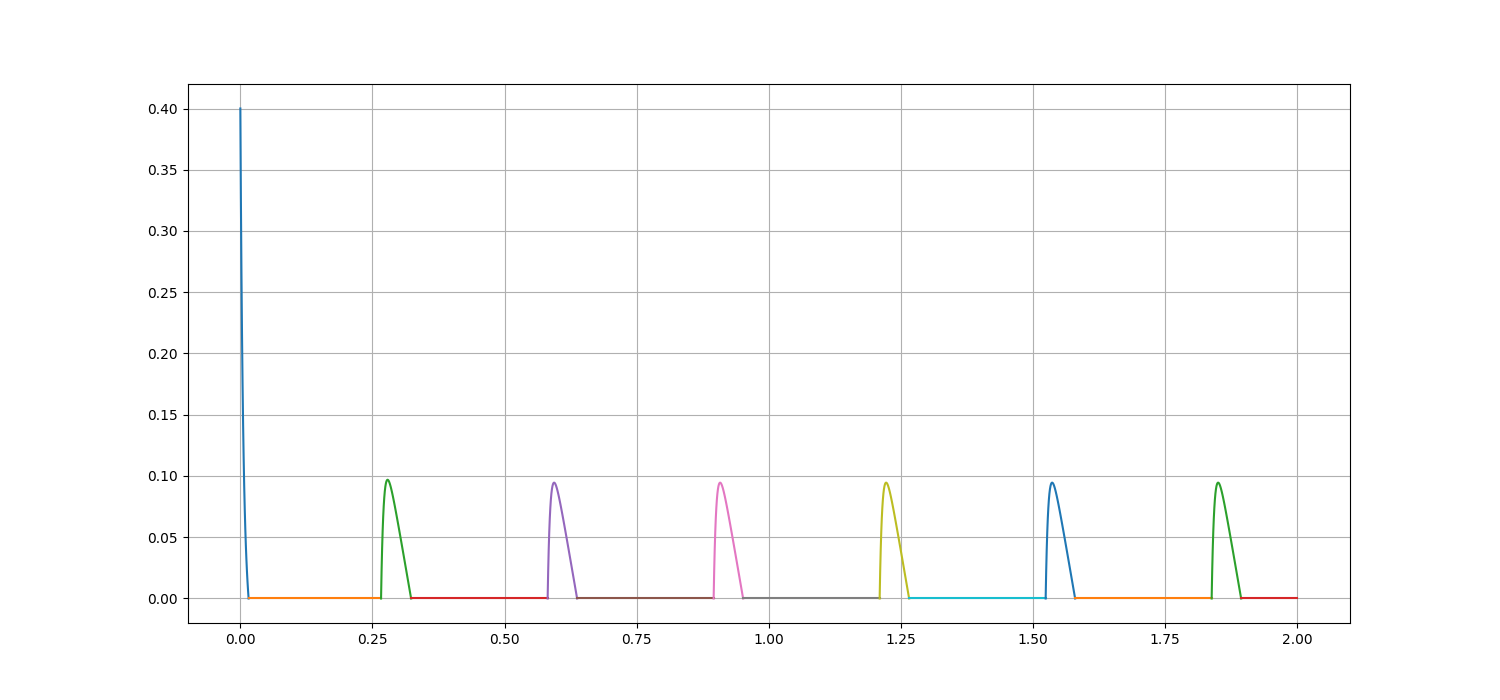

In [42]:
measurments =   [   
                    (t0, Id, "Id(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 2, 0.001, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()